# Target test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ta.trend import SMAIndicator

In [2]:
# Temporary solution
import sys
sys.path.insert(0, '..')
import useful_functions as uf

In [3]:
df = pd.read_csv("../data/BTCUSDT-minute.csv")

In [4]:
df

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
0,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,1502942459999,7.564907e+03,3,0.075183,3.203909e+02,7960.540180
1,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,1502942519999,0.000000e+00,0,0.000000,0.000000e+00,7960.452630
2,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1502942579999,1.117543e+03,2,0.261074,1.117543e+03,7960.375295
3,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,1502942639999,5.117185e+01,3,0.012008,5.117185e+01,7960.375295
4,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,1502942699999,5.999993e+02,1,0.140796,5.999993e+02,7960.375295
...,...,...,...,...,...,...,...,...,...,...,...,...
1988733,2021-06-03 20:24:00,38665.26,38689.56,38655.91,38682.52,14.795718,1622751899999,5.722516e+05,457,5.929895,2.293488e+05,0.000000
1988734,2021-06-03 20:25:00,38682.52,38682.53,38643.07,38649.70,16.778473,1622751959999,6.486770e+05,563,6.614560,2.557099e+05,0.000000
1988735,2021-06-03 20:26:00,38649.69,38682.52,38649.69,38682.52,15.709853,1622752019999,6.074695e+05,566,11.004542,4.255326e+05,0.000000
1988736,2021-06-03 20:27:00,38682.52,38682.69,38640.40,38649.38,23.010205,1622752079999,8.894626e+05,590,7.261787,2.806922e+05,0.000000


In [83]:
# df = df[1970000:1980000]

In [6]:
for i,c in enumerate(df['close']):
    acc = []
    

0 4261.48
1 4261.48
2 4261.48
3 4261.48
4 4261.48


In [85]:
def get_target(df, span:int, tp:float, sl:float):
    """
    gets target. must have tp or greater within span and no sl in span
    tp: 1.5
    sl: 2.5
    """
    acc = [] #target column

    for i in range(len(df["close"])):
        close = df.iloc[i].close
        high = df.iloc[i].high
        low = df.iloc[i].low
        
        if i+span < len(df["close"]):
            tp_price = (1+tp/100)*close
            sl_price = (1-sl/100)*close
            high = max(df.iloc[i+1:i+span].high)
            low = min(df.iloc[i+1:i+span].low)
            
            if low<sl_price:
                acc.append(0)
            elif high>tp_price:
                acc.append(1)
            else:
                acc.append(0)
        else:
            acc.append(None)

    return acc
    

In [118]:
def get_target_faster(df, span:int, tp:float, sl:float):
    target = []
    sdf = df[['close','high']]
    c_high = max(sdf['high'][0:span])
    
    for i in range(sdf.shape[0]):
        
        #progress tracker
        if i %100000 == 0:
            print('█', end="")
        
        if i+span >= len(sdf['close']): 
            target.append(None)
            continue
            
        close = sdf['close'][i]
        tp_price = (1+tp/100)*close
        sl_price = (1-sl/100)*close
        
        if c_high == sdf['high'][i]:
            high = max(sdf['high'][i+1:i+span])
        else:
            high = max(c_high, sdf['high'][i+span])
        c_high = high
        
        target.append(1 if high>tp_price else 0)
    
    print(' DONE')
    return target

In [123]:
df["target"] = get_target_faster(df, span=200, tp=1.5, sl=2.5)

████████████████████ DONE


In [37]:
df["scatter_target"] = list(map(lambda x, c: c if x == 1 else None, df["target"], df["close"]))

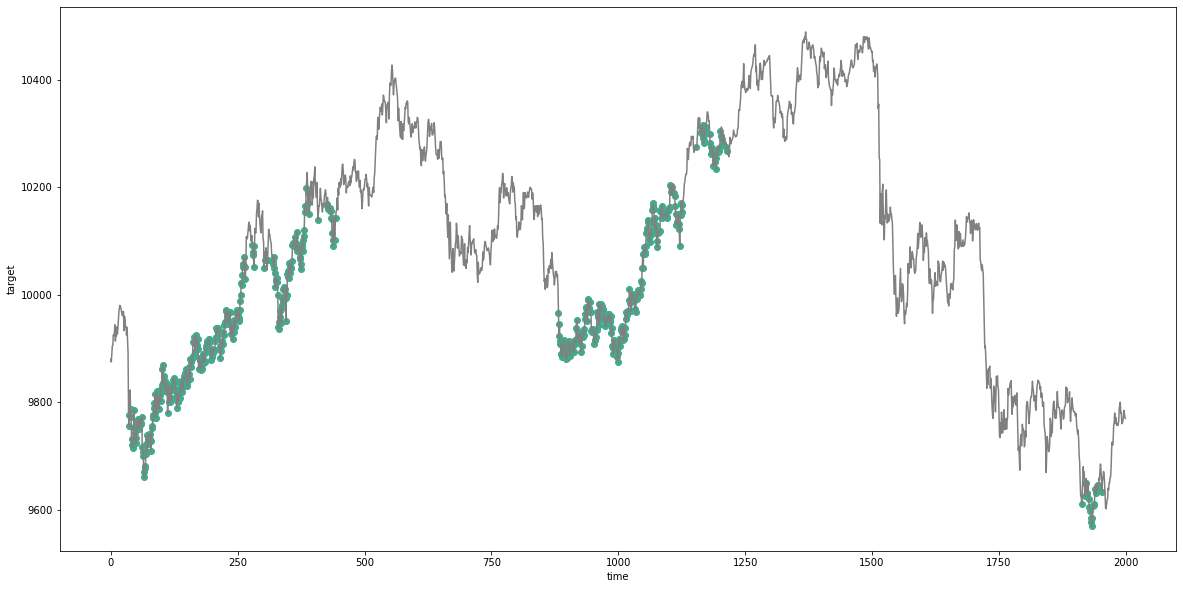

In [38]:
d = df[271000:273000]

fig,ax = plt.subplots(figsize=(20, 10))
ax.scatter(range(len(d)),
           d.scatter_target,
            color="#43aa8b")
# ax.axhline(y=0, color='darkgreen', linestyle='-')
ax.set_xlabel("time")
ax.set_ylabel("target")

# ax.tick_params(labelbottom=False)    
# ax.axes.xaxis.set_visible(False)

# ax2=ax.twinx()
ax.plot(list(d.close),
         color="grey")

# ax.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

In [64]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go

In [ ]:
# d = df[1000000:]
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=d.index, y=d['close'], name='close'))
# fig.add_trace(go.Scatter(x=d.index, y=d['scatter_target'], name='target'))

# fig.show()

In [88]:
df.target.value_counts(), df.target.value_counts()[1]/(df.target.value_counts()[0]+df.target.value_counts()[1])

(0.0    1550531
 1.0     438007
 Name: target, dtype: int64,
 0.2202658435493815)

In [92]:
df.to_csv("../data/BTCUSDT-minute-target-tpsl.csv", index=False)